# Problem 2

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn import tree
from sklearn.tree import _tree

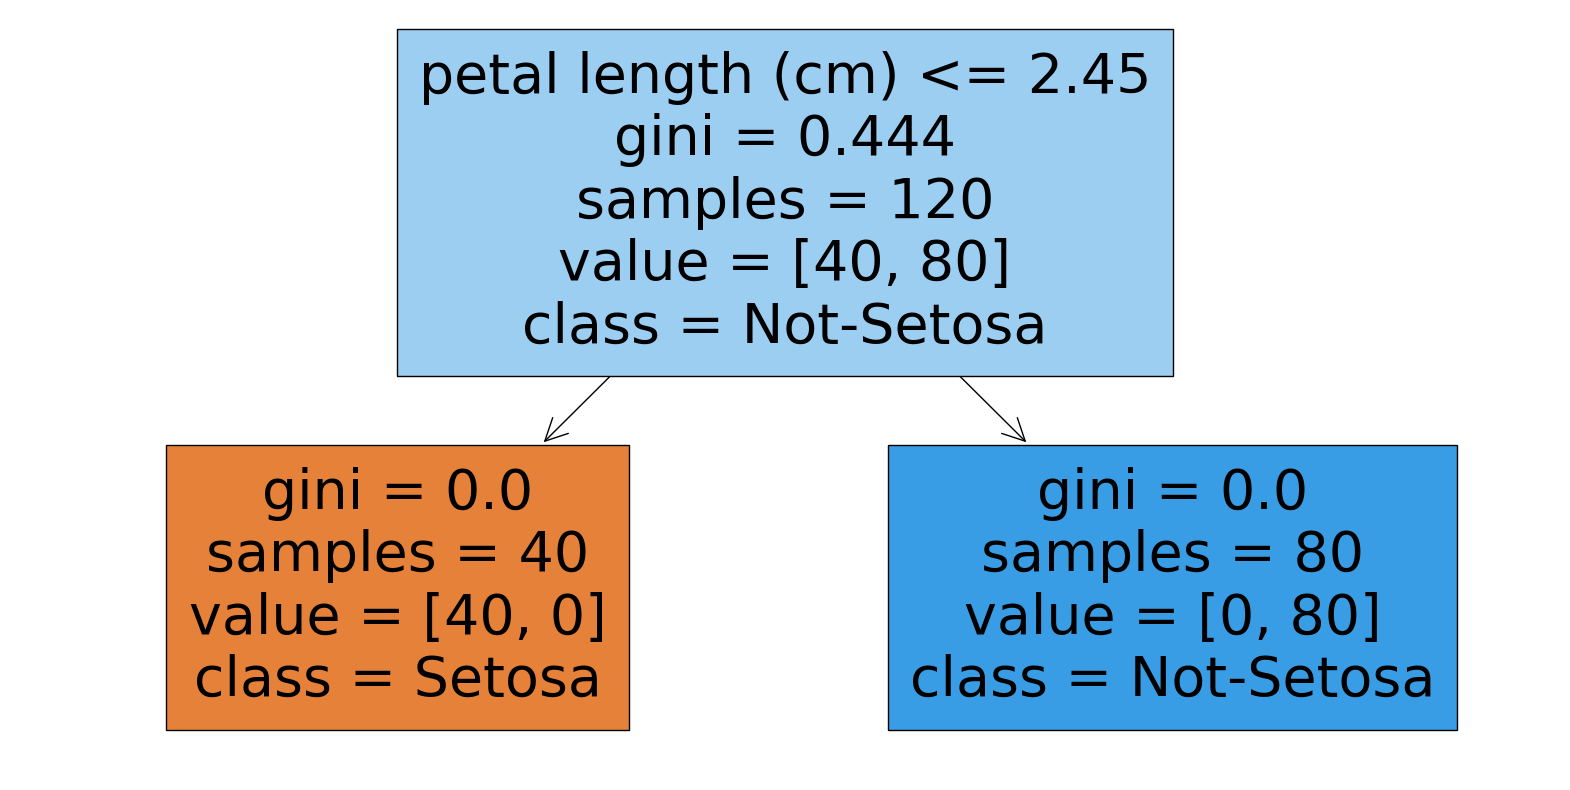

Test Error: 0.0


In [2]:
# ===== Load the Iris dataset ===== #
iris = load_iris()
data = iris.data
classes = iris.target

# ===== End of Load the Iris dataset ===== #

# ===== Merge classes for binary classification ===== #
merged = np.where(classes == 0, 0, 1)
# ===== End of Merge classes for binary classification ===== #

# ===== Splitting data into training and testing sets ===== #
#separate out so can put into trainig set
data_setosa = data[merged == 0][:40]
class_setosa = merged[merged == 0][:40]

data_not = data[merged == 1][:80]
class_not = merged[merged == 1][:80]

#combine to make training set
data_train = np.concatenate((data_setosa, data_not))
class_train = np.concatenate((class_setosa, class_not))

#do similar for test set with everything else
data_test = np.concatenate((data[merged == 0][40:], data[merged != 0][80:]))
class_test = np.concatenate((merged[merged == 0][40:], merged[merged != 0][80:]))
# ===== End of Splitting data into training and testing sets ===== #

# ===== Train the Decision Tree ===== #
dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(data_train, class_train)
# ===== End of Train the Decision Tree ===== #

# ===== Plotting the Decision Tree ===== #
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=iris.feature_names, class_names=['Setosa', 'Not-Setosa'])
plt.show()
# ===== End of Plotting the Decision Tree ===== #

# ===== Test the decision tree and report test error ===== #
class_test_pred = dt.predict(data_test)
test_error = 1 - accuracy_score(class_test, class_test_pred)

print("Test Error:", test_error)
# ===== End of Test the decision tree and report test error ===== #


In [3]:
# ===== Build decision tree classifier ===== #
# ===== End of Build decision tree classifier ===== #

def tree_to_code(tree, feature_names):
	"""
	Outputs a decision tree model as a Python function

	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	# ===== Implement the function ===== #
	# Reference: https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html
	tree_ = tree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def helper(node, depth):
		indent = "  " * depth
        #if this node hasn't been defined yet in printout, make if statement to print
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			helper(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			helper(tree_.children_right[node], depth + 1)
		else: #otherwise, print the return statement edit this a bit to print the actual class
			print("{}return {}".format(indent, np.argmax(tree_.value[node])))

	helper(0, 1)
    # ===== End of Implement the function ===== #


In [4]:
# Print the tree
tree_to_code(dt, list(iris.feature_names))

def tree(sepal length (cm), sepal width (cm), petal length (cm), petal width (cm)):
  if petal length (cm) <= 2.449999988079071:
    return 0
  else:  # if petal length (cm) > 2.449999988079071
    return 1
